In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import math

In [2]:
dataset = "dataset"
folders = [folder for folder in os.listdir(dataset) if os.path.isdir(os.path.join(dataset, folder))]

In [3]:
num_files = np.array([len(os.listdir(os.path.join(dataset, folder))) for folder in folders])

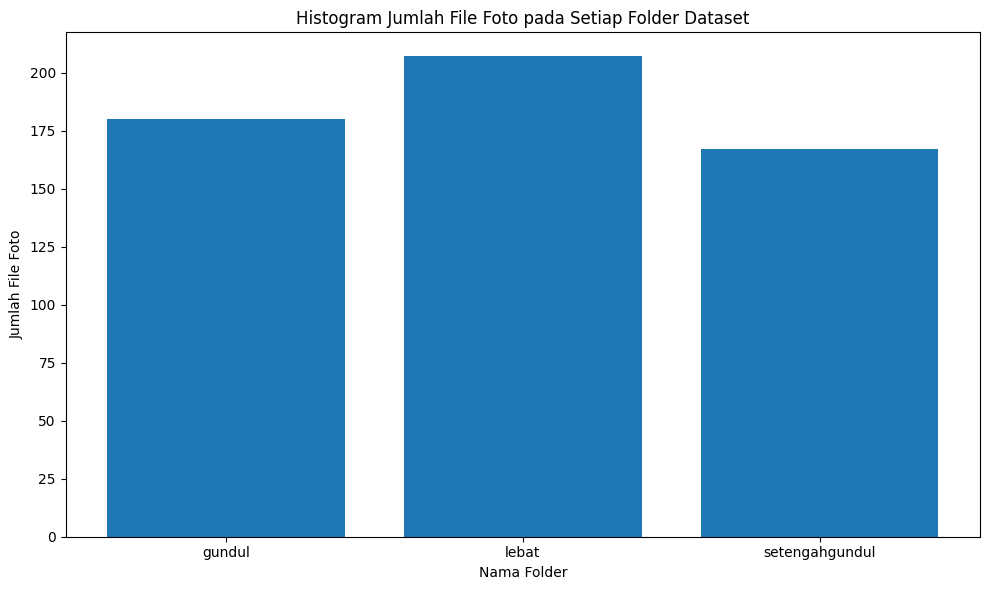

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(folders, num_files)
plt.xlabel('Nama Folder')
plt.ylabel('Jumlah File Foto')
plt.title('Histogram Jumlah File Foto pada Setiap Folder Dataset')
plt.tight_layout()
plt.show()

In [5]:
def insertGambar(folder, num_records, new_size=None):
    data = []
    labels = []
    filenames = []
    datalabel = []
    
    for label in os.listdir(folder):
        datalabel.append(label)
        print(f"Processing label: {label}")
        img_count = 0
        for filename in os.listdir(os.path.join(folder, label)):
            if img_count >= num_records:
                break
            img_path = os.path.join(folder, label, filename)
            img = cv2.imread(img_path)
            if img is not None:
                if new_size:
                    img = cv2.resize(img, new_size)
                data.append(img)
                labels.append(label)
                filenames.append(filename)
                img_count += 1

    return data, filenames, datalabel, labels

In [6]:
data, filenames, datalabel, labels = insertGambar(dataset, 120, new_size=(150, 150))

Processing label: gundul
Processing label: lebat
Processing label: setengahgundul


In [7]:
def imageByLabel(dataset):
    folders = [folder for folder in os.listdir(dataset) if os.path.isdir(os.path.join(dataset, folder))]
    
    fig, axs = plt.subplots(1, len(folders), figsize=(15, 5))
    for i, folder in enumerate(folders):
        folder_path = os.path.join(dataset, folder)
        image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png')]
        
        if len(image_files) > 0:
            random_image = random.choice(image_files)
            img_path = os.path.join(folder_path, random_image)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            axs[i].imshow(img)
            axs[i].set_title(f"Label: {folder}")
            axs[i].axis('off')

    plt.show()

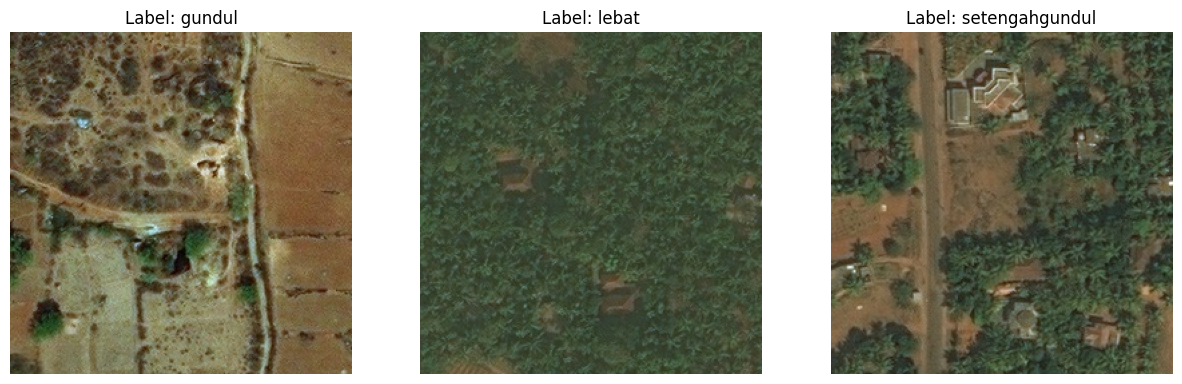

In [8]:
imageByLabel(dataset)

In [9]:
def rotate(image, angle):
    height, width = image.shape[:2]

    center_x = width // 2
    center_y = height // 2

    angle_radian = np.radians(angle)

    cos_angle = np.cos(angle_radian)
    sin_angle = np.sin(angle_radian)
    
    rotated_image = np.zeros_like(image)
    for y in range(height):
        for x in range(width):
            new_x = int((x - center_x) * cos_angle - (y - center_y) * sin_angle + center_x)
            new_y = int((x - center_x) * sin_angle + (y - center_y) * cos_angle + center_y)

            if 0 <= new_x < width and 0 <= new_y < height:
                rotated_image[new_y, new_x] = image[y, x]
    
    return rotated_image

In [10]:
num_photos = 100
count = 0

for i in range(len(data)):
    if count >= num_photos:
        break

    img = data[i]
    label = labels[i]

    rotated_image = rotate(img, 90)

    data.append(rotated_image)
    labels.append(label)
    
    count += 1

In [11]:
def show_images(images, titles=None):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        if titles is not None:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()

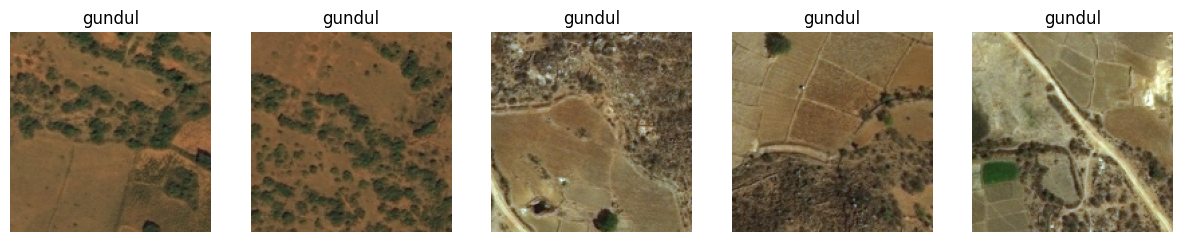

In [12]:
show_images(data[:5], labels[:5])

In [13]:
def glcm0(img):
    max_val = np.max(img)
    imgTemp = np.zeros([max_val+1, max_val+1])

    for i in range(len(img)):
        for j in range(len(img[i])-1):
            imgTemp[img[i, j], img[i, j+1]] += 1

    data = imgTemp + np.transpose(imgTemp)
    temp = np.sum(data)

    if temp != 0:
        data /= temp

    return data

In [14]:
def glcm45(img):
    max_val = np.max(img)
    imgTemp = np.zeros([max_val+1, max_val+1])

    for i in range(len(img)-1):
        for j in range(len(img[i])-1):
            imgTemp[img[i+1, j], img[i, j+1]] += 1

    data = imgTemp + np.transpose(imgTemp)
    temp = np.sum(data)

    if temp != 0:
        data /= temp

    return data

In [15]:
def glcm90(img):
    max_val = np.max(img)
    imgTemp = np.zeros([max_val+1, max_val+1])

    for i in range(len(img)-1):
        for j in range(len(img[i])):
            imgTemp[img[i+1, j], img[i, j]] += 1

    data = imgTemp + np.transpose(imgTemp)
    temp = np.sum(data)

    if temp != 0:
        data /= temp

    return data

In [16]:
def glcm135(img):
    max_val = np.max(img)
    imgTemp = np.zeros([max_val+1, max_val+1])

    for i in range(len(img)-1):
        for j in range(len(img[i])-1):
            imgTemp[img[i, j], img[i+1, j+1]] += 1

    data = imgTemp + np.transpose(imgTemp)
    temp = np.sum(data)

    if temp != 0:
        data /= temp

    return data

In [18]:
def contrast(data):
    contrast = 0
    for i in range(len(data)):
        for j in range(len(data)):
            contrast += data[i,j] + (i-j)**2
            
    return contrast

In [19]:
def dissimilarity(data):
    diss = 0
    for i in range (len(data)):
        for j in range(len(data)):
            diss += data[i,j] + abs(i-j)
            
    return diss

In [20]:
def homogenity(data):
    homogen = 0
    for i in range (len(data)):
        for j in range(len(data)):
            homogen += data[i,j] / (1 + abs(i-j))

    return homogen

In [21]:
def energy(data):
    energy = 0
    for i in range (len(data)):
        for j in range(len(data)):
            energy += pow(data[i,j], 2)
    return energy

In [22]:
def calculate_correlation(data, mean_i, mean_j, std_dev_i, std_dev_j):
    if std_dev_i == 0 or std_dev_j == 0:
        return 0
    
    corr = 0
    for i in range(len(data)):
        for j in range(len(data)):
            corr += ((i - mean_i) * (j - mean_j) * data[i, j]) / (std_dev_i * std_dev_j)
            
    return corr

In [23]:
def entropy(data):
    entropy = 0
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i,j] > 0:
                entropy += -(data[i,j] * math.log(data[i,j]))
                
    return entropy

In [24]:
def ASM(data):
    asm = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            asm += data[i][j] ** 2
            
    return asm

In [25]:
def mean_i(data):
    mean_value = 0
    for i in range(len(data)):
        for j in range(len(data)):
            mean_value += i * data[i, j]

    return mean_value

In [26]:
def mean_j(data):
    mean_value = 0
    for i in range(len(data)):
        for j in range(len(data)):
            mean_value += j * data[i, j]

    return mean_value

In [27]:
def std_dev_i(data, mean_i_value):
    std_dev_value = 0
    
    for i in range(len(data)):
        for j in range(len(data)):
            std_dev_value += pow((i - mean_i_value), 2) * data[i, j]

    std_dev_value = math.sqrt(std_dev_value)

    return std_dev_value

In [28]:
def std_dev_j(data, mean_j_value):
    std_dev_value = 0
    
    for i in range(len(data)):
        for j in range(len(data)):
            std_dev_value += pow((j - mean_j_value), 2) * data[i, j]

    std_dev_value = math.sqrt(std_dev_value)
    
    return std_dev_value

In [29]:
headerCols = ['contrast_0', 'contrast_45', 'contrast_90', 'contrast_135',
            'dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90', 'dissimilarity_135',
            'homogeneity_0', 'homogeneity_45', 'homogeneity_90', 'homogeneity_135',
            'energy_0', 'energy_45', 'energy_90', 'energy_135',
            'correlation_0', 'correlation_45', 'correlation_90', 'correlation_135',
            'entropy_0', 'entropy_45', 'entropy_90', 'entropy_135',
            'asm_0', 'asm_45', 'asm_90', 'asm_135', 'labels']

In [37]:
def featureAnalysis(result, labels):
    part = []
    correlation_val = []

    for i, glcm_matrix in enumerate(result):
        save = []

        for j in glcm_matrix:
            kontras = contrast(j)
            save.append(kontras)

            diss = dissimilarity(j)
            save.append(diss)

            hom = homogenity(j)
            save.append(hom)

            eng = energy(j)
            save.append(eng)
            
            mI = mean_i(j)
            mJ = mean_j(j)
            sDI = std_dev_i(j, mI)
            sDJ = std_dev_j(j, mJ)
            corr = calculate_correlation(j, mI, mJ, sDI, sDJ)
            save.append(corr)
            
            ent = entropy(j)
            save.append(ent)
            
            asm_value = ASM(j)
            save.append(asm_value)

        save.append(labels[i])
        part.append(save)

        if all(value != 0 for value in [kontras, diss, hom, eng, corr, ent, asm_value]):
            correlation_val.append((kontras, diss, hom, eng, corr, ent, asm_value))

    return part, correlation_val

In [40]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer

In [41]:
def features_score(data, label_column):
    X = data.drop(columns=[label_column])
    y = data[label_column]

    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    min_val = np.min(X_imputed)
    if min_val < 0:
        X_imputed += abs(min_val)

    selector = SelectKBest(score_func=chi2)
    selector.fit(X_imputed, y)

    scores = selector.scores_

    feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

    feature_scores = feature_scores.sort_values(by='Score', ascending=False)

    return feature_scores

In [42]:
headerCols = ['contrast_0', 'contrast_45', 'contrast_90', 'contrast_135',
            'dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90', 'dissimilarity_135',
            'homogeneity_0', 'homogeneity_45', 'homogeneity_90', 'homogeneity_135',
            'energy_0', 'energy_45', 'energy_90', 'energy_135',
            'correlation_0', 'correlation_45', 'correlation_90', 'correlation_135',
            'entropy_0', 'entropy_45', 'entropy_90', 'entropy_135',
            'asm_0', 'asm_45', 'asm_90', 'asm_135', 'labels']

In [31]:
def normalize(train, test):
    train = train.astype(np.float32)
    test = test.astype(np.float32)
    
    min_vals = train.min(axis=0)
    max_vals = train.max(axis=0)
    
    train_normalized = (train - min_vals) / (max_vals - min_vals)
    test_normalized = (test - min_vals) / (max_vals - min_vals)
    
    return train_normalized, test_normalized

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
def evaluate_model(model, X_test_scaled, y_test, model_name):
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f'{model_name} - Accuracy: {accuracy:.6f}')
    print(f'{model_name} - Precision: {precision:.6f}')
    print(f'{model_name} - Recall: {recall:.6f}')
    print(f'{model_name} - F1-Score: {f1:.6f}')
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'\nConfusion Matrix for {model_name}:')
    print(conf_matrix)
    
    plt.figure(figsize=(8, 6))
    mask = (np.eye(len(conf_matrix)) == 1)
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', mask=mask, cbar=False)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', mask=~mask, cbar=False)
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    return accuracy, precision, recall, f1

In [17]:
hasil_ori = []
for img in data:
    res_ori = []
    res_ori.append(glcm0(img))
    res_ori.append(glcm45(img))
    res_ori.append(glcm90(img))
    res_ori.append(glcm135(img))
    hasil_ori.append(res_ori)

In [39]:
part_original, corr_value_ori = featureAnalysis(hasil_ori, labels)

In [43]:
df = pd.DataFrame(part_original, columns=headerCols)

In [44]:
df.to_csv('hasilPercobaan4_original.csv',index=False)

In [45]:
results_ori = pd.read_csv('hasilPercobaan4_original.csv')
results_ori

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,correlation_135,entropy_0,entropy_45,entropy_90,entropy_135,asm_0,asm_45,asm_90,asm_135,labels
0,1.563100e+08,1.786401e+06,0.273404,0.000521,0.957049,8.050887,0.000521,1.563100e+08,1.786401e+06,0.241591,...,8.185899,0.000465,1.563100e+08,1.786401e+06,0.239697,0.000430,0.924681,8.278883,0.000430,gundul
1,9.870276e+07,1.265421e+06,0.258627,0.000509,0.948812,8.045545,0.000509,9.870276e+07,1.265421e+06,0.225281,...,8.158310,0.000463,9.870276e+07,1.265421e+06,0.225877,0.000421,0.911318,8.264633,0.000421,gundul
2,6.937083e+08,5.462271e+06,0.185760,0.000196,0.880890,8.934065,0.000196,6.937083e+08,5.462271e+06,0.159872,...,8.999593,0.000181,6.937083e+08,5.462271e+06,0.169016,0.000169,0.819401,9.088853,0.000169,gundul
3,6.828480e+08,5.398009e+06,0.210396,0.000243,0.929353,8.630762,0.000243,6.828480e+08,5.398009e+06,0.183050,...,8.745404,0.000217,6.828480e+08,5.398009e+06,0.182902,0.000197,0.879137,8.848902,0.000197,gundul
4,7.158170e+08,5.592321e+06,0.191683,0.000180,0.920213,9.078148,0.000180,7.158170e+08,5.592321e+06,0.164966,...,9.060133,0.000179,7.158170e+08,5.592321e+06,0.182097,0.000163,0.905318,9.154707,0.000163,gundul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,1.492859e+08,1.725849e+06,0.242677,0.000360,0.887010,8.288631,0.000360,1.492859e+08,1.725849e+06,0.228418,...,8.194713,0.000395,1.492859e+08,1.725849e+06,0.222989,0.000314,0.852072,8.435744,0.000314,gundul
456,8.896195e+07,1.170553e+06,0.285924,0.000527,0.927191,7.981818,0.000527,8.896195e+07,1.170553e+06,0.274975,...,7.886825,0.000569,8.896195e+07,1.170553e+06,0.272548,0.000483,0.906192,8.094410,0.000483,gundul
457,1.599136e+08,1.817201e+06,0.239559,0.000365,0.905693,8.352164,0.000365,1.599136e+08,1.817201e+06,0.227686,...,8.273124,0.000393,1.599136e+08,1.817201e+06,0.222192,0.000324,0.872418,8.490704,0.000324,gundul
458,1.994748e+08,2.144891e+06,0.243870,0.000456,0.915570,8.229786,0.000456,1.994748e+08,2.144891e+06,0.231554,...,8.141770,0.000491,1.994748e+08,2.144891e+06,0.224561,0.000410,0.883569,8.373923,0.000410,gundul


In [46]:
best_features_ori = features_score(results_ori, 'labels')

print("Fitur terbaik berdasarkan skor:")
print(best_features_ori)

Fitur terbaik berdasarkan skor:
              Feature         Score
0          contrast_0  6.323447e+09
14          energy_90  6.323447e+09
21         entropy_45  6.323447e+09
7   dissimilarity_135  6.323447e+09
22         entropy_90  4.094654e+07
1         contrast_45  4.094654e+07
15         energy_135  4.094654e+07
8       homogeneity_0  4.094654e+07
25             asm_45  5.419837e+00
11    homogeneity_135  4.197520e+00
18     correlation_90  3.442470e+00
12           energy_0  2.864764e+00
26             asm_90  2.718409e+00
5    dissimilarity_45  2.669076e+00
19    correlation_135  2.352722e+00
4     dissimilarity_0  1.980471e+00
23        entropy_135  8.409091e-01
16      correlation_0  8.070852e-01
9      homogeneity_45  6.085105e-01
2         contrast_90  4.889117e-01
3        contrast_135  7.660781e-03
6    dissimilarity_90  7.660781e-03
13          energy_45  6.826309e-03
10     homogeneity_90  6.826309e-03
24              asm_0  6.432954e-03
27            asm_135  6.432954e

In [47]:
from sklearn.model_selection import train_test_split

In [52]:
dataTrain_ori = pd.read_csv('hasilPercobaan4_original.csv')

X = dataTrain_ori[['contrast_0', 'energy_90', 'entropy_45', 'dissimilarity_135', 'entropy_90', 'contrast_45', 'energy_135', 'homogeneity_0', 'asm_45', 'homogeneity_135', 'correlation_90', 'energy_0', 'asm_90', 'dissimilarity_45', 'dissimilarity_45', 'dissimilarity_0']]
y = dataTrain_ori['labels']

X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
X_train_ori_scaled, X_test_ori_scaled = normalize(X_train_ori, X_test_ori)

In [54]:
print("Data Pelatihan Setelah Normalisasi Min-Max:")
print(X_train_ori_scaled)
print("\nData Pengujian Setelah Normalisasi Min-Max:")
print(X_test_ori_scaled)

Data Pelatihan Setelah Normalisasi Min-Max:
     contrast_0  energy_90  entropy_45  dissimilarity_135  entropy_90  \
108    0.184794   0.184794    0.184794           0.184794    0.259134   
428    0.620345   0.620345    0.620345           0.620345    0.687848   
430    0.728242   0.728242    0.728242           0.728242    0.780368   
118    0.204889   0.204889    0.204889           0.204889    0.282163   
114    0.184794   0.184794    0.184794           0.184794    0.259134   
..          ...        ...         ...                ...         ...   
106    0.273944   0.273944    0.273944           0.273944    0.357772   
270    0.430997   0.430997    0.430997           0.430997    0.515256   
348    1.000000   1.000000    1.000000           1.000000    1.000000   
435    0.544804   0.544804    0.544804           0.544804    0.620758   
102    0.124719   0.124719    0.124719           0.124719    0.186616   

     contrast_45  energy_135  homogeneity_0    asm_45  homogeneity_135  \
108  

K-Nearest Neighbors - Accuracy: 0.826087
K-Nearest Neighbors - Precision: 0.803968
K-Nearest Neighbors - Recall: 0.805859
K-Nearest Neighbors - F1-Score: 0.802188

Confusion Matrix for K-Nearest Neighbors:
[[71  3  8]
 [ 0 27  0]
 [13  0 16]]


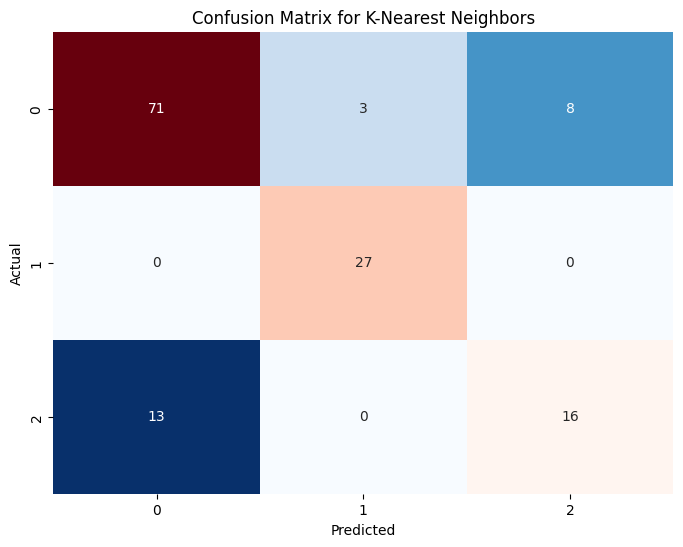

In [55]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_ori_scaled, y_train_ori)
knn_metrics = evaluate_model(knn_model, X_test_ori_scaled, y_test_ori, 'K-Nearest Neighbors')

SVM - Accuracy: 0.833333
SVM - Precision: 0.825362
SVM - Recall: 0.780207
SVM - F1-Score: 0.784755

Confusion Matrix for SVM:
[[76  2  4]
 [ 0 27  0]
 [16  1 12]]


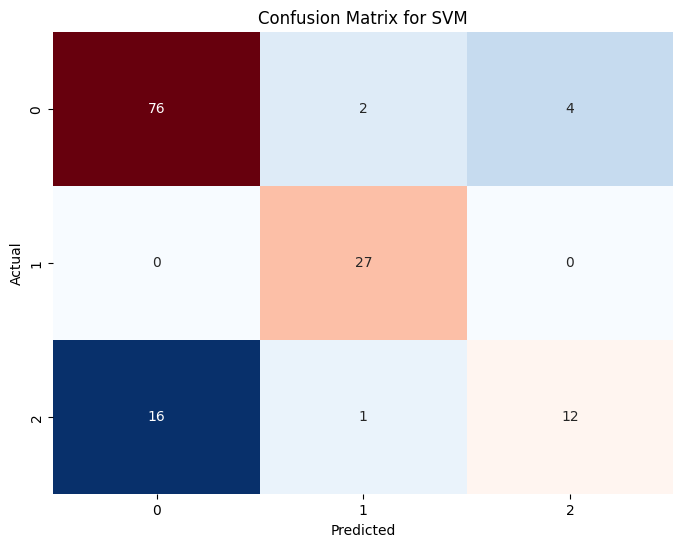

In [57]:
svm_model = SVC()
svm_model.fit(X_train_ori_scaled, y_train_ori)
svm_metrics = evaluate_model(svm_model, X_test_ori_scaled, y_test_ori, 'SVM')

Random Forest - Accuracy: 0.833333
Random Forest - Precision: 0.812427
Random Forest - Recall: 0.816502
Random Forest - F1-Score: 0.814296

Confusion Matrix for Random Forest:
[[71  2  9]
 [ 0 26  1]
 [11  0 18]]


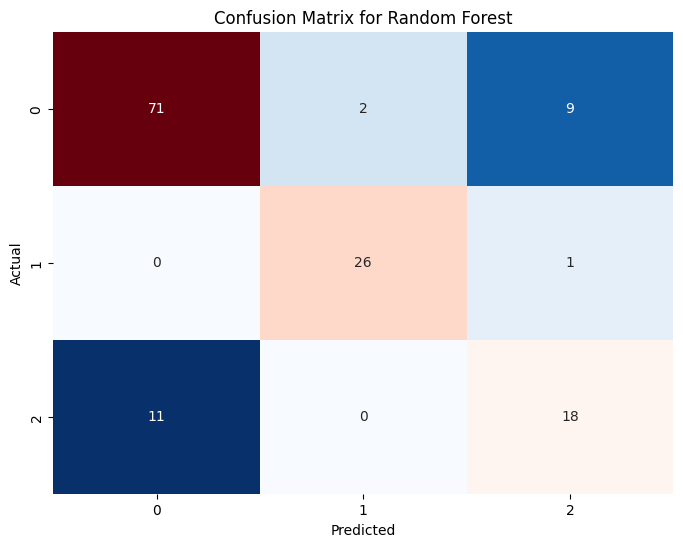

In [58]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_ori_scaled, y_train_ori)
rf_metrics = evaluate_model(rf_model, X_test_ori_scaled, y_test_ori, 'Random Forest')

In [59]:
def displayRes(images, title):
    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.title(title + f' {i+1}')
    plt.show()

In [60]:
def rgb_to_hsv(image):
    image = image.astype(np.float32) / 255.0
    hsv_image = np.zeros_like(image)
    
    r, g, b = image[..., 0], image[..., 1], image[..., 2]
    
    v = np.max(image, axis=-1)
    
    diff = v - np.min(image, axis=-1)
    s = np.zeros_like(v)
    s[v != 0] = diff[v != 0] / v[v != 0]

    h = np.zeros_like(v)
    
    mask = diff != 0
    mask_r = (mask) & (v == r)
    mask_g = (mask) & (v == g)
    mask_b = (mask) & (v == b)
    
    h[mask_r] = (60 * ((g[mask_r] - b[mask_r]) / diff[mask_r]) + 360) % 360
    h[mask_g] = (60 * ((b[mask_g] - r[mask_g]) / diff[mask_g]) + 120) % 360
    h[mask_b] = (60 * ((r[mask_b] - g[mask_b]) / diff[mask_b]) + 240) % 360
    
    hsv_image[..., 0] = h
    hsv_image[..., 1] = s
    hsv_image[..., 2] = v

    hsv_image[..., 0] = hsv_image[..., 0] / 2
    
    return hsv_image

In [61]:
def in_range(hsv, lower_bound, upper_bound):
    mask = np.ones(hsv.shape[:2], dtype=np.uint8)
    
    for i in range(3):
        mask &= (hsv[..., i] >= lower_bound[i]) & (hsv[..., i] <= upper_bound[i])
    
    return mask

In [62]:
def bitwise(image, mask):
    result = np.zeros_like(image)

    for i in range(3):
        result[..., i] = image[..., i] * mask
    
    return result

In [63]:
def color_segmentation(images):
    segmented_images = []

    lower_green = np.array([30, 40 / 255, 40 / 255])
    upper_green = np.array([90, 255 / 255, 255 / 255])

    for image in images:
        hsv = rgb_to_hsv(np.copy(image))
        mask = in_range(hsv, lower_green, upper_green)
        segmented_image = bitwise(image, mask)
        segmented_images.append(np.copy(segmented_image))

    return segmented_images

In [64]:
segmented = color_segmentation(data)

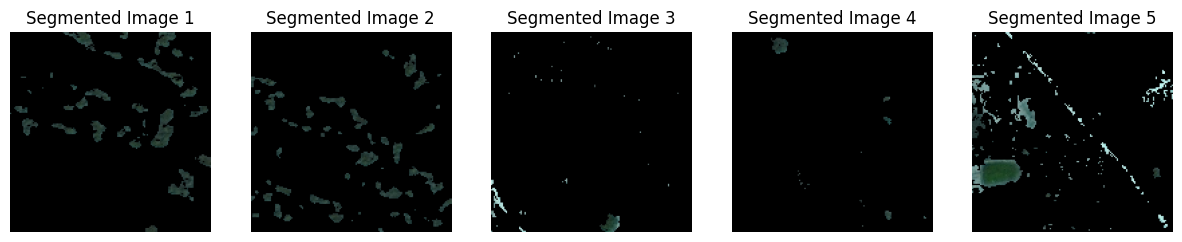

In [65]:
displayRes(segmented, "Segmented Image")

In [66]:
def calculate_histogram(image):
    hist = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        hist[pixel] += 1
    
    return hist

In [67]:
def calculate_cdf(hist):
    cdf = np.zeros_like(hist, dtype=float)
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i] = cdf[i-1] + hist[i]
        
    return cdf

In [68]:
def normalize_cdf(cdf):
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    
    if cdf_min == cdf_max:
        return np.full_like(cdf, 128, dtype='uint8')
    
    cdf_normalized = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)
    
    return cdf_normalized.astype('uint8')

In [69]:
def apply_equalization(image, cdf_normalized):
    equalized_image = np.zeros_like(image, dtype='uint8')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized_image[i, j] = cdf_normalized[image[i, j]]
            
    return equalized_image

In [70]:
def gray_to_bgr(gray_image):
    bgr_image = np.stack((gray_image,)*3, axis=-1)

    return bgr_image

In [71]:
def histogram_equalization(images):
    equalized_images = []

    for image in images:
        if len(image.shape) == 3:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray_image = image

        hist = calculate_histogram(gray_image)
        cdf = calculate_cdf(hist)
        cdf_normalized = normalize_cdf(cdf)
        equalized_image = apply_equalization(gray_image, cdf_normalized)

        if len(image.shape) == 3:
            equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)

        equalized_images.append(np.copy(equalized_image))

    return equalized_images

In [72]:
def enhance_image(images):
    enhanced_images = []

    for image in images:
        gray = cv2.cvtColor(np.copy(image), cv2.COLOR_BGR2GRAY)
        equalized_image = histogram_equalization([gray])
        enhanced_images.append(np.copy(equalized_image[0]))

    return enhanced_images

In [73]:
enhanced = enhance_image(segmented)

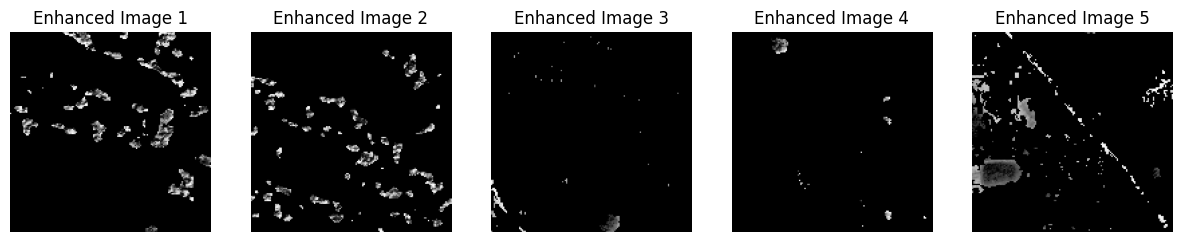

In [74]:
displayRes(enhanced, "Enhanced Image")

In [75]:
def normalize_images(images):
    normalized_images = []
    for img in images:
        img_float = img.astype(np.float32)

        min_val = np.min(img_float)
        max_val = np.max(img_float)
        
        if min_val == max_val:
            normalized_img = np.full_like(img, 128, dtype=np.uint8)
        else:
            normalized_img = (img_float - min_val) * (255.0 / (max_val - min_val))
            normalized_img = normalized_img.astype(np.uint8)

        normalized_images.append(np.copy(normalized_img))

    return normalized_images

In [76]:
normalized = normalize_images(enhanced)

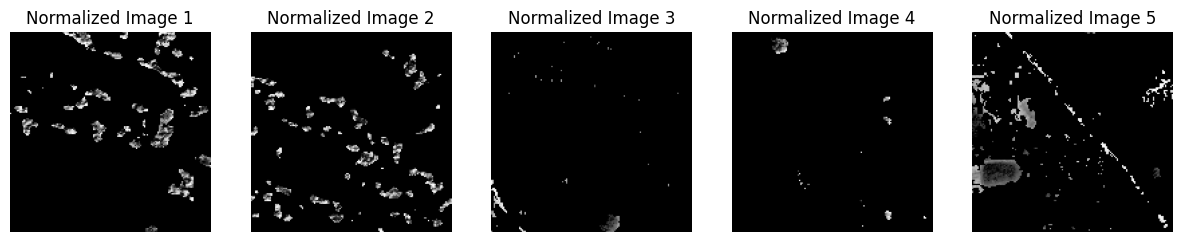

In [77]:
displayRes(normalized, "Normalized Image")

In [78]:
def erode(image, kernel):
    eroded_image = np.ones_like(image, dtype=np.uint8) * 255

    ksize = kernel.shape[0]
    pad_amount = ksize // 2

    padded_image = np.pad(image, pad_amount, mode='constant', constant_values=255)

    for i in range(pad_amount, padded_image.shape[0] - pad_amount):
        for j in range(pad_amount, padded_image.shape[1] - pad_amount):
            image_patch = padded_image[i-pad_amount:i+pad_amount+1, j-pad_amount:j+pad_amount+1]
            eroded_image[i-pad_amount, j-pad_amount] = np.min(image_patch)
    
    return eroded_image

In [79]:
def dilate(image, kernel):
    dilated_image = np.zeros_like(image, dtype=np.uint8)

    ksize = kernel.shape[0]
    pad_amount = ksize // 2

    padded_image = np.pad(image, pad_amount, mode='constant', constant_values=0)

    for i in range(pad_amount, padded_image.shape[0] - pad_amount):
        for j in range(pad_amount, padded_image.shape[1] - pad_amount):
            image_patch = padded_image[i-pad_amount:i+pad_amount+1, j-pad_amount:j+pad_amount+1]
            dilated_image[i-pad_amount, j-pad_amount] = np.max(image_patch)
    
    return dilated_image

In [80]:
def opening(images, kernel_size):
    opened_images = []
    
    kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
    
    for image in images:
        if len(image.shape) == 2 or (len(image.shape) == 3 and image.shape[2] == 3):
            if len(image.shape) == 3:
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            else:
                gray_image = image

            eroded_image = erode(gray_image, kernel)
            opened_image = dilate(eroded_image, kernel)
            
            opened_images.append(opened_image)
        else:
            print(f"Skipping image with invalid shape: {image.shape}")
    
    return opened_images

In [81]:
opened = opening(normalized, 2)

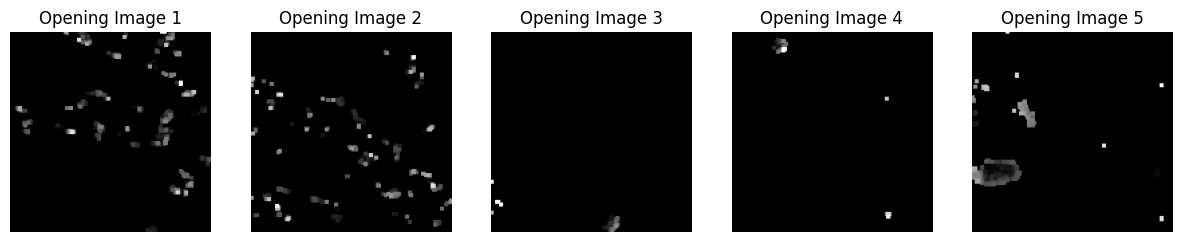

In [82]:
displayRes(opened, "Opening Image")

In [83]:
def convolve(image, kernel):
    img_height, img_width = image.shape
    ker_height, ker_width = kernel.shape

    pad_height = ker_height // 2
    pad_width = ker_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    result = np.zeros_like(image)

    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i+ker_height, j:j+ker_width]
            result[i, j] = np.sum(region * kernel)
    
    return result

In [84]:
def sobel(image):
    gradien_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    gradien_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])

    conv_gx = convolve(image, gradien_x)
    conv_gy = convolve(image, gradien_y)
    
    magnitude = np.sqrt(conv_gx**2 + conv_gy**2)
    
    if np.max(magnitude) != 0:
        magnitude = np.uint8(255 * magnitude / np.max(magnitude))
    else:
        magnitude = np.zeros_like(magnitude, dtype=np.uint8)

    return magnitude

In [85]:
def edge_detection(images):
    edge_images = []
    for image in images:
        if len(image.shape) == 3:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray = image

        edges = sobel(gray)
        edge_images.append(edges)

    return edge_images

In [86]:
edge_detected = edge_detection(opened)

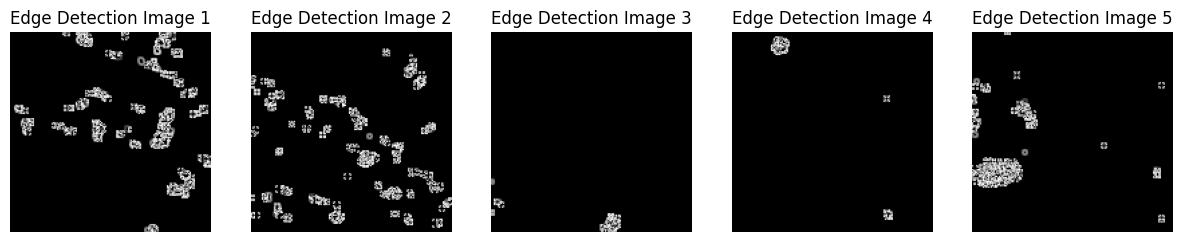

In [87]:
displayRes(edge_detected, "Edge Detection Image")

In [88]:
hasil = []
for img in edge_detected:
    res = []
    res.append(glcm0(img))
    res.append(glcm45(img))
    res.append(glcm90(img))
    res.append(glcm135(img))
    hasil.append(res)

In [89]:
part, correlation_val = featureAnalysis(hasil, labels)

In [90]:
df = pd.DataFrame(part, columns=headerCols)

In [91]:
df.to_csv('hasilPercobaan4.csv',index=False)

In [92]:
results = pd.read_csv('hasilPercobaan4.csv')
results

,contrast_0,contrast_45,contrast_90,contrast_135,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,homogeneity_0,homogeneity_45,...,correlation_135,entropy_0,entropy_45,entropy_90,entropy_135,asm_0,asm_45,asm_90,asm_135,labels
0,7.158170e+08,5592321.0,0.881915,0.760572,0.720363,1.255871,0.760572,7.158170e+08,5592321.0,0.870700,...,1.257192,0.760107,7.158170e+08,5592321.0,0.871994,0.744559,0.616086,1.324082,0.744559,gundul
1,7.158170e+08,5592321.0,0.880896,0.756053,0.652269,1.194334,0.756053,7.158170e+08,5592321.0,0.868204,...,1.201018,0.754344,7.158170e+08,5592321.0,0.868880,0.735444,0.548146,1.279780,0.735444,gundul
2,7.158170e+08,5592321.0,0.989244,0.976339,0.759307,0.130880,0.976339,7.158170e+08,5592321.0,0.988422,...,0.128329,0.976605,7.158170e+08,5592321.0,0.988360,0.975203,0.672458,0.135540,0.975203,gundul
3,7.158170e+08,5592321.0,0.989091,0.976958,0.716976,0.127829,0.976958,7.158170e+08,5592321.0,0.988211,...,0.127206,0.977047,7.158170e+08,5592321.0,0.988115,0.975114,0.638507,0.136916,0.975114,gundul
4,7.158170e+08,5592321.0,0.940098,0.874466,0.757146,0.674122,0.874466,7.158170e+08,5592321.0,0.935294,...,0.686765,0.871624,7.158170e+08,5592321.0,0.935089,0.865674,0.688052,0.712724,0.865674,gundul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,7.158170e+08,5592321.0,0.975739,0.947817,0.713984,0.278426,0.947817,7.158170e+08,5592321.0,0.973565,...,0.274492,0.948862,7.158170e+08,5592321.0,0.973470,0.943617,0.607335,0.298638,0.943617,gundul
456,7.158170e+08,5592321.0,0.997413,0.994371,0.680921,0.031012,0.994371,7.158170e+08,5592321.0,0.997422,...,0.030585,0.994460,7.158170e+08,5592321.0,0.997077,0.993794,0.558783,0.033524,0.993794,gundul
457,7.158170e+08,5592321.0,0.993333,0.985024,0.665123,0.077488,0.985024,7.158170e+08,5592321.0,0.992621,...,0.079270,0.984758,7.158170e+08,5592321.0,0.992406,0.983226,0.543689,0.086838,0.983226,gundul
458,7.158170e+08,5592321.0,0.968644,0.930739,0.672493,0.354466,0.930739,7.158170e+08,5592321.0,0.964492,...,0.351802,0.931171,7.158170e+08,5592321.0,0.964008,0.923089,0.533450,0.384741,0.923089,gundul


In [93]:
best_features = features_score(results, 'labels')

print("Fitur terbaik berdasarkan skor:")
print(best_features)

Fitur terbaik berdasarkan skor:
              Feature         Score
21         entropy_45  1.877722e+09
7   dissimilarity_135  1.877722e+09
0          contrast_0  1.877722e+09
14          energy_90  1.877722e+09
8       homogeneity_0  1.465139e+07
22         entropy_90  1.465139e+07
1         contrast_45  1.465139e+07
15         energy_135  1.465139e+07
26             asm_90  1.295534e+03
12           energy_0  1.295222e+03
19    correlation_135  1.289491e+03
5    dissimilarity_45  1.287868e+03
13          energy_45  1.469427e+02
10     homogeneity_90  1.469427e+02
24              asm_0  1.469276e+02
27            asm_135  1.469276e+02
17     correlation_45  1.445713e+02
20          entropy_0  1.445713e+02
3        contrast_135  1.443514e+02
6    dissimilarity_90  1.443514e+02
9      homogeneity_45  9.502286e+01
23        entropy_135  9.501000e+01
16      correlation_0  8.828639e+01
2         contrast_90  8.774970e+01
25             asm_45  3.104408e+01
11    homogeneity_135  3.064017e

In [97]:
dataTrain = pd.read_csv('hasilPercobaan4.csv')

X = dataTrain[['entropy_45', 'dissimilarity_135', 'contrast_0', 'energy_90', 'homogeneity_0', 'entropy_90', 'contrast_45', 'energy_135', 'asm_90', 'energy_0', 'correlation_135', 'dissimilarity_45']]
y = dataTrain['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
X_train_scaled, X_test_scaled = normalize(X_train, X_test)

In [99]:
print("Data Pelatihan Setelah Normalisasi Min-Max:")
print(X_train_scaled)
print("\nData Pengujian Setelah Normalisasi Min-Max:")
print(X_test_scaled)

Data Pelatihan Setelah Normalisasi Min-Max:
     entropy_45  dissimilarity_135  contrast_0  energy_90  homogeneity_0  \
108         0.0                0.0         0.0        0.0            0.0   
428         1.0                1.0         1.0        1.0            1.0   
430         0.0                0.0         0.0        0.0            0.0   
118         1.0                1.0         1.0        1.0            1.0   
114         1.0                1.0         1.0        1.0            1.0   
..          ...                ...         ...        ...            ...   
106         1.0                1.0         1.0        1.0            1.0   
270         1.0                1.0         1.0        1.0            1.0   
348         1.0                1.0         1.0        1.0            1.0   
435         1.0                1.0         1.0        1.0            1.0   
102         1.0                1.0         1.0        1.0            1.0   

     entropy_90  contrast_45  energy_135   

K-Nearest Neighbors - Accuracy: 0.934783
K-Nearest Neighbors - Precision: 0.932773
K-Nearest Neighbors - Recall: 0.909707
K-Nearest Neighbors - F1-Score: 0.920576

Confusion Matrix for K-Nearest Neighbors:
[[80  0  2]
 [ 0 25  2]
 [ 5  0 24]]


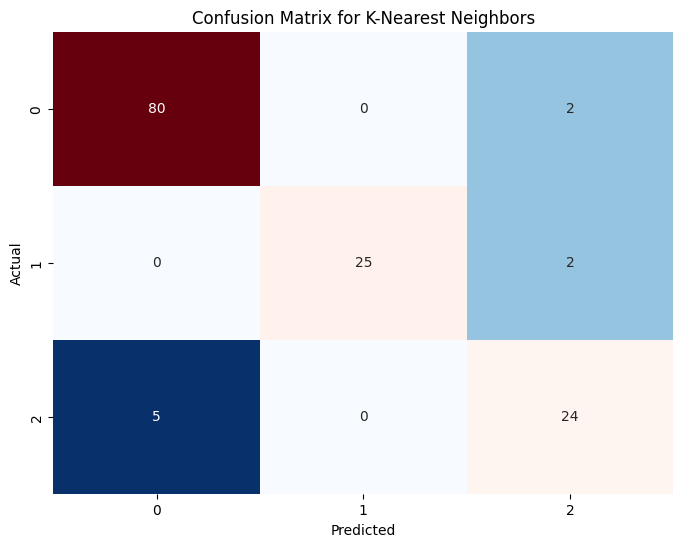

In [100]:
knn_model_fix = KNeighborsClassifier()
knn_model_fix.fit(X_train_scaled, y_train)
knn_metrics_fix = evaluate_model(knn_model_fix, X_test_scaled, y_test, 'K-Nearest Neighbors')

SVM - Accuracy: 0.934783
SVM - Precision: 0.921856
SVM - Recall: 0.910559
SVM - F1-Score: 0.915225

Confusion Matrix for SVM:
[[80  0  2]
 [ 0 26  1]
 [ 4  2 23]]


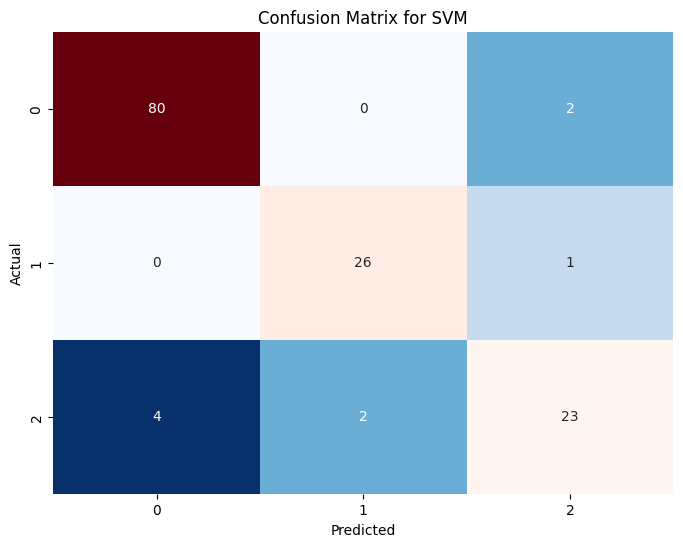

In [101]:
svm_model_fix = SVC()
svm_model_fix.fit(X_train_scaled, y_train)
svm_metrics_fix = evaluate_model(svm_model_fix, X_test_scaled, y_test, 'SVM')

Random Forest - Accuracy: 0.905797
Random Forest - Precision: 0.898126
Random Forest - Recall: 0.886018
Random Forest - F1-Score: 0.891511

Confusion Matrix for Random Forest:
[[77  0  5]
 [ 0 25  2]
 [ 6  0 23]]


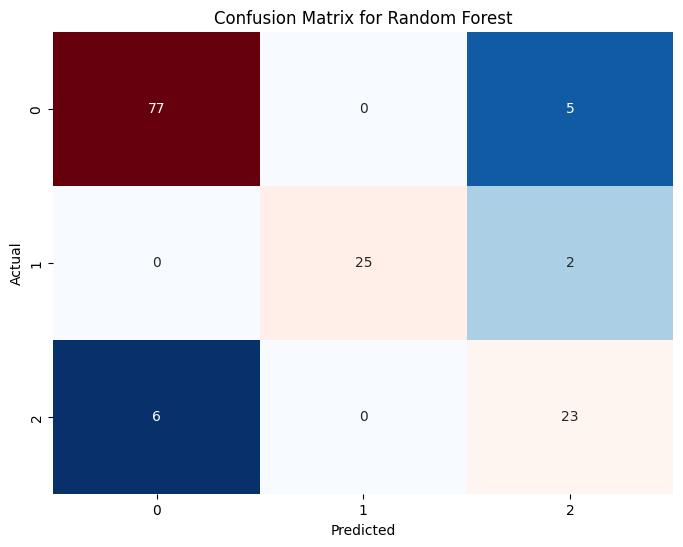

In [102]:
rf_model_fix = RandomForestClassifier()
rf_model_fix.fit(X_train_scaled, y_train)
rf_metrics_fix = evaluate_model(rf_model_fix, X_test_scaled, y_test, 'Random Forest')

In [103]:
modelResults = {
    'Model': ['K-Nearest Neighbors', 'SVM', 'Random Forest'],
    'Accuracy': [knn_metrics_fix[0], svm_metrics_fix[0], rf_metrics_fix[0]],
    'Precision': [knn_metrics_fix[1], svm_metrics_fix[1], rf_metrics_fix[1]],
    'Recall': [knn_metrics_fix[2], svm_metrics_fix[2], rf_metrics_fix[2]],
    'F1-Score': [knn_metrics_fix[3], svm_metrics_fix[3], rf_metrics_fix[3]]
}

In [105]:
modelResults_df = pd.DataFrame(modelResults)
print(modelResults_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors  0.934783   0.932773  0.909707  0.920576
1                  SVM  0.934783   0.921856  0.910559  0.915225
2        Random Forest  0.905797   0.898126  0.886018  0.891511


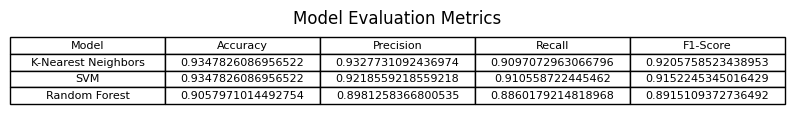

In [106]:
fig, ax = plt.subplots(figsize=(10, 1))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=modelResults_df.values, colLabels=modelResults_df.columns, cellLoc='center', loc='center')
plt.title('Model Evaluation Metrics')
plt.show()

In [107]:
def display_predictions(model, X_test_scaled, y_test, num_samples=50):
    y_pred = model.predict(X_test_scaled)
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    print(f"Displaying {num_samples} predictions for the model:")
    print(results.sample(num_samples))

In [111]:
display_predictions(knn_model_fix, X_test_scaled, y_test)

Displaying 50 predictions for the model:
             Actual       Predicted
439          gundul          gundul
450          gundul          gundul
409          gundul          gundul
401          gundul          gundul
247  setengahgundul          gundul
419          gundul          gundul
434          gundul          gundul
63           gundul          gundul
66           gundul          gundul
356  setengahgundul  setengahgundul
338  setengahgundul  setengahgundul
60           gundul          gundul
277  setengahgundul  setengahgundul
173           lebat           lebat
155           lebat           lebat
346  setengahgundul  setengahgundul
0            gundul          gundul
291  setengahgundul          gundul
110          gundul          gundul
237           lebat           lebat
157           lebat           lebat
137           lebat           lebat
55           gundul          gundul
192           lebat           lebat
318  setengahgundul  setengahgundul
30           gundul    

In [110]:
display_predictions(rf_model_fix, X_test_scaled, y_test)

Displaying 50 predictions for the model:
             Actual       Predicted
429          gundul          gundul
450          gundul          gundul
101          gundul          gundul
346  setengahgundul  setengahgundul
33           gundul          gundul
305  setengahgundul  setengahgundul
409          gundul          gundul
124           lebat           lebat
11           gundul          gundul
397          gundul          gundul
274  setengahgundul  setengahgundul
436          gundul  setengahgundul
29           gundul          gundul
25           gundul          gundul
157           lebat           lebat
318  setengahgundul  setengahgundul
296  setengahgundul  setengahgundul
247  setengahgundul          gundul
245  setengahgundul          gundul
419          gundul          gundul
116          gundul          gundul
376          gundul          gundul
323  setengahgundul  setengahgundul
434          gundul          gundul
291  setengahgundul          gundul
55           gundul    

In [112]:
display_predictions(svm_model_fix, X_test_scaled, y_test)

Displaying 50 predictions for the model:
             Actual       Predicted
332  setengahgundul           lebat
11           gundul          gundul
42           gundul          gundul
3            gundul          gundul
433          gundul          gundul
70           gundul          gundul
439          gundul          gundul
193           lebat           lebat
321  setengahgundul  setengahgundul
445          gundul          gundul
116          gundul          gundul
402          gundul          gundul
157           lebat           lebat
291  setengahgundul          gundul
222           lebat           lebat
361          gundul          gundul
45           gundul          gundul
63           gundul          gundul
154           lebat           lebat
19           gundul          gundul
231           lebat  setengahgundul
436          gundul          gundul
195           lebat           lebat
304  setengahgundul  setengahgundul
24           gundul          gundul
397          gundul    